# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

 Изучив информацию о таблице, можно отметить, что имеются столбцы с пропусками значений. Далее можно подробнее посмотреть сколько строк с пропусками и в каких именно столбцах:

In [3]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
pd.DataFrame(round(data.isna().mean()*100)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Построим гистограммы для каждого из столбцов, чтобы предварительно оценить диапазон значений в них и имеющееся распределение:

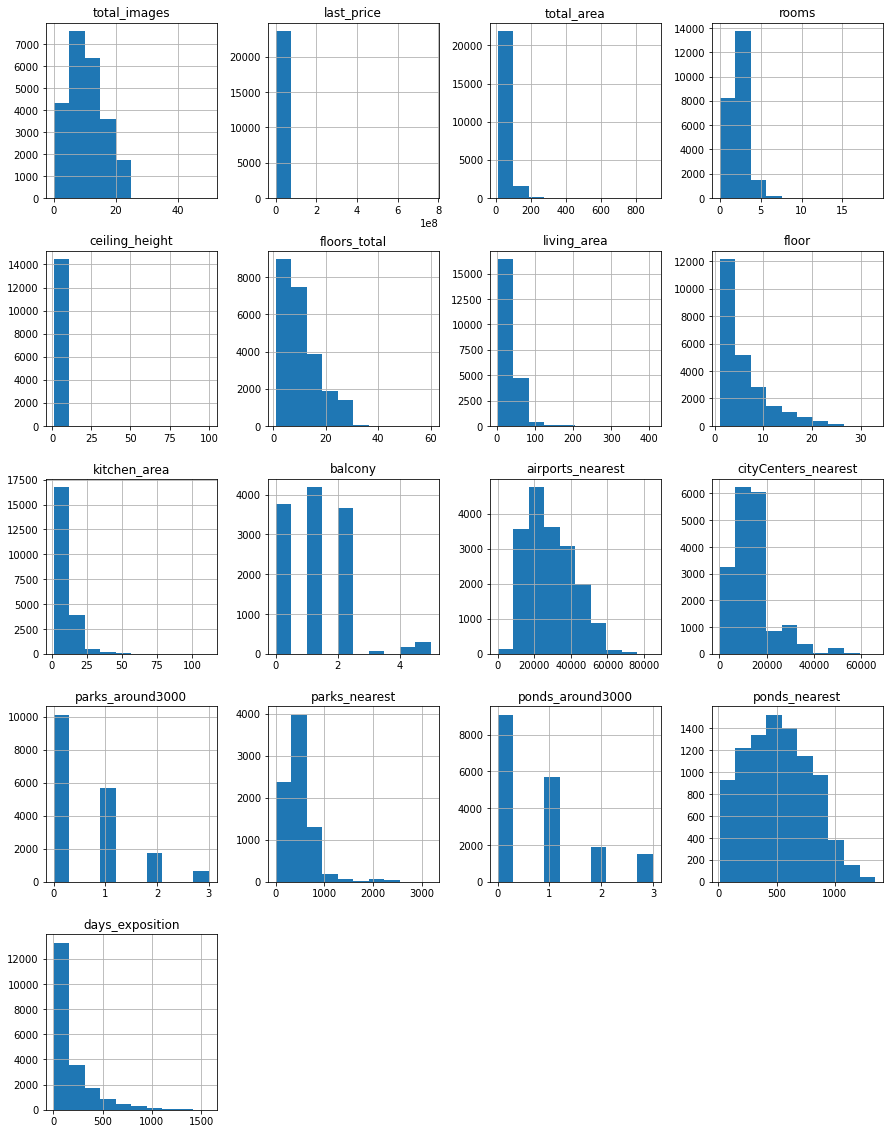

In [5]:
data.hist(figsize=(15, 20));

### Предобработка данных

#### Найдите и изучите пропущенные значения в столбцах:

Снова посмтрим на количество пропусков в столбцах:


In [6]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

 Большое количество пропусков (20 924) имеется в столбце is_apartment — апартаменты (булев тип). Скорее всего, данные квартиры не являются апартаментами, поэтому эти значения и не заполнили. Заполним их значениями False.

In [7]:
data['is_apartment'] = data['is_apartment'].fillna(value='False')
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


 В столбце balcony — число балконов также имеется много пропусков (11 519). Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0.

In [8]:
data['balcony'] = data['balcony'].fillna(value=0)
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


 Имеющиеся пропуски по столбцу ceiling_height — высота потолков (м) заполним медианным значением всего столбца. Чтобы медиана вышла адекватной, сперва надо найти и поработать с аномалиями.

In [9]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

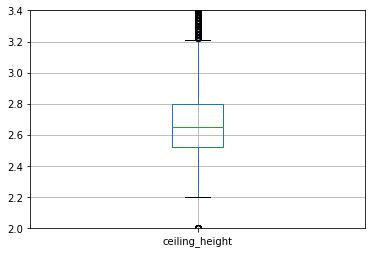

In [10]:
import matplotlib.pyplot as plt
data.boxplot('ceiling_height')
plt.ylim(2,3.4);

Можно заметить, что в столбце имеются выбросы, которые оказались существенно дальше от стандартного отклонения, просмотрим уникальные значения по столбцу, чтобы понять какие именно это значения.

In [11]:
data['ceiling_height'].sort_values().unique()


array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

В таблице имеются потолки, высотой больше 20м. Скорее всего, это опечатка, где неверно проставлена запятая, исправим такие значения, поделив их на 10.

In [12]:
data.loc[data['ceiling_height']>=20, ['ceiling_height']] = data['ceiling_height']/10

In [13]:
data['ceiling_height'].sort_values().unique()

array([ 1.  ,  1.2 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,  2.3 ,  2.34,
        2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,
        2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,
        2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,
        2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,
        2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,
        2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,
        2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,
        3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,
        3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,
        3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,
        3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,
        3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,
        3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,
        3.65,  3.66,

Проверили, что аномальные значения исправлены и теперь можно заполнить пропуски медианным значением по столбцу:

In [14]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Также у нас имеются пропуски в столбцах с картографическими данными (airports_nearest-5542, cityCenters_nearest-5519, 
parks_around3000-5518, parks_nearest-15620, ponds_around3000-5518, ponds_nearest-14589), эти пропуски мы заполнять не будем, так как точно их заполнить не получится, и эти данные нам не очень важны в рамках проводимого анализа.

Похожая ситуация и со столбцом days_exposition — сколько дней было размещено объявление (от публикации до снятия), эти данные нам неоткуда взять, а удалять все строки с пропусками по этому столбцу не стоит, так как потеряем слишком много информации (это 3172 строки, или 13% от всех строк в таблице).

Далее нужно обработать столбец floors_total - всего этажей в доме, в нем находится небольшое количество пропусков (86 строк, это всего лишь 0,4% от общего количества строк). Такую информацию сложно получить, а заполнять средними значениями - некорректно и не имеет смысла, так что можно просто удалить эти строки, это не окажет существенного
влияния на результаты анализа.

In [15]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [16]:
data = data.dropna(subset=['floors_total'])

In [17]:
data['floors_total'].describe() #проверяем, что основные показатели остались неизменны после удаления строк

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Пропуски в столбце living_area — жилая площадь в квадратных метрах (м²) следует заполнить, это важная информация для нашего анализа. Чтобы не искажать данные, высчитаем средние показатели с помощью коэффициента соотношения жилой площади к общей.

In [18]:
data['living_area'].describe()

count    21743.000000
mean        34.462781
std         22.037433
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [19]:
k_living_area = data['living_area'].mean()/data['total_area'].mean()
data['living_area'] = data['living_area'].fillna(k_living_area*data['total_area'])
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,90.810749,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.400000,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.600000,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,40.893394,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.430000,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.600000,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Чтобы проверить, что искажения данных не произошло, снова посмотрим на основные показатели данных по столбцу и увидим, что изменений практически нет.

In [20]:
data['living_area'].describe()

count    23613.000000
mean        34.602495
std         22.367962
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

Таким же образом заполним пропущенные значения в столбце kitchen_area — площадь кухни в квадратных метрах (м²).

In [21]:
data['kitchen_area'].describe()

count    21382.000000
mean        10.564128
std          5.904316
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [22]:
k_kitchen_area = data['kitchen_area'].mean()/data['total_area'].mean()
data['kitchen_area'] = data['kitchen_area'].fillna(k_kitchen_area*data['total_area'])
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,False,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,False,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,90.810749,9,False,...,27.836882,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.400000,5,False,...,9.100000,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.600000,6,False,...,14.400000,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,40.893394,22,False,...,18.900000,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.430000,26,False,...,8.810000,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.600000,7,False,...,6.500000,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [23]:
data['kitchen_area'].describe()

count    23613.000000
mean        10.503068
std          6.040315
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Рассмотрим подробнее столбец с пропусками locality_name — название населённого пункта.

In [24]:
data['locality_name'].describe()

count               23565
unique                364
top       Санкт-Петербург
freq                15651
Name: locality_name, dtype: object

In [25]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Изучив уникальные значения в столбце с наименованиями населенных пунктов, можно заметить наличие неявных дубликатов. Заменим названия в существующем столбце.

In [26]:
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')

In [27]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

Названия населенных пунктов в пропущенных ячейках угадать вряд ли получится, но их тут и незначительное количество (49 
строк), можно удалить такие строки.

In [28]:
data = data.dropna(subset=['locality_name'])

Проверим, что все пропуски, которые мы решили обработать заполнены или удалены. Остались только пропуски, которые мы решили оставить.

In [29]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [30]:
data.duplicated().sum()

0

Также проверили таблицу на наличие явных дубликатых. Их количество = 0.

Таким образом, таблица содержала пропуски как в картографических данных, так и в добавленных пользователем. 

Картографические данные, такие как расстояние до аэропорта, ближайшего парка и водоёма, могут содержать пропуски по причине отсутствия таких объектов поблизости, либо вызваны ошибкой сбора или выгрузки данных.

Пропуски в данных, добавленных пользователем вручную могли появиться в виду человеческого фактора. Можно порекомендовать, сделать заполнение всех параметров обязательным, чтобы система не давала опубликовать объявления, пока не будут заполнены все параметры. Тогда мы сможем получить полные данные без пропусков.

#### Рассмотрите типы данных в каждом столбце:

In [31]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Имеет смысл изменить тип данных в столбцах: floors_total, balcony. Вещественные числа в них поменяем на целые, так как данные показатели применяются привычно именно в целочисленном измерении и в дальнейшем мы будем применять к ним методы для работы с целыми числами.

In [32]:
data['floors_total'] = data['floors_total'].astype('int')

In [33]:
data['balcony'] = data['balcony'].astype('int')

Также в столбце first_day_exposition — дата публикации тип данных следует поменять на Datetime.

In [34]:
#data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition']=data['first_day_exposition'].astype('datetime64')
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23565, dtype: datetime64[ns]

In [35]:
data['last_price'] = data['last_price'].astype('int')

In [36]:
data.dtypes # проверим, что в указанных столбцах произошло изменение типа данных

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

### Посчитайте и добавьте в таблицу новые столбцы

In [37]:
data['price_of_one_meter'] = (data['last_price']/data['total_area']).round() #цена одного квадратного метра
data['price_of_one_meter']


0        120370.0
1         82921.0
2         92786.0
3        408176.0
4        100000.0
           ...   
23694     72491.0
23695     52542.0
23696     44092.0
23697    149511.0
23698     41796.0
Name: price_of_one_meter, Length: 23565, dtype: float64

In [38]:
data['weekday'] = data['first_day_exposition'].dt.weekday #день недели публикации объявления
data['month'] = data['first_day_exposition'].astype('datetime64[M]') #месяц публикации объявления
data['year'] = data['first_day_exposition'].dt.year #год публикации объявления
data[['first_day_exposition', 'weekday', 'month', 'year']]

,first_day_exposition,weekday,month,year
0,2019-03-07,3,2019-03-01,2019
1,2018-12-04,1,2018-12-01,2018
2,2015-08-20,3,2015-08-01,2015
3,2015-07-24,4,2015-07-01,2015
4,2018-06-19,1,2018-06-01,2018
...,...,...,...,...
23694,2017-03-21,1,2017-03-01,2017
23695,2018-01-15,0,2018-01-01,2018
23696,2018-02-11,6,2018-02-01,2018
23697,2017-03-28,1,2017-03-01,2017


In [39]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)#тип этажа квартиры (значения — «первый», «последний», «другой»)
data[['floor','floors_total','floor_type']]


,floor,floors_total,floor_type
0,8,16,другой
1,1,11,первый
2,4,5,другой
3,9,14,другой
4,13,14,другой
...,...,...,...
23694,3,5,другой
23695,4,5,другой
23696,1,3,первый
23697,12,17,другой


In [40]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round() #расстояние до центра города в километрах
data['cityCenters_nearest_km']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: cityCenters_nearest_km, Length: 23565, dtype: float64

### Проведите исследовательский анализ данных

#### Изучите следующие параметры объектов:

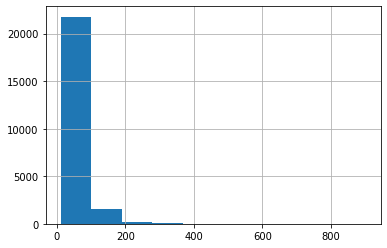

In [41]:
data['total_area'].hist();

In [42]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

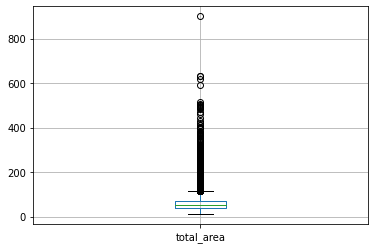

In [43]:
data.boxplot('total_area');

Из-за выбивающихся больших значений при небольшом стандартном отклонении общей площади на гистограмме основная масса сгруппировалась в один диапазон примерно от 12 до 70 метров. Не хотелось бы удалять эти "выбросы" и терять данные. Чтобы рассмотреть гистограмму подробнее, зададим условие в ее параметре.


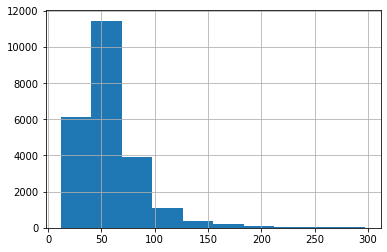

In [44]:
data[data['total_area']<300]['total_area'].hist();


Теперь можно увидеть, что наибольшее количество квартир(более 10 000) имеют площадь от 40 до 70 кв.м., далее идут самые маленькие по площади квартиры (до 40 кв.м.) их около 6000 обьектов, квартир с площадью более 70 кв.м. всего 25% от общего числа.
Распределение на гистограмме близко к распределению Пуассона.

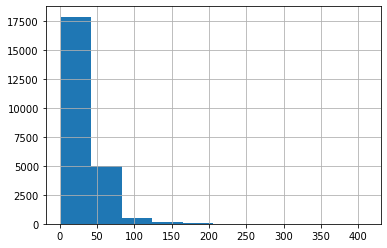

In [45]:
data['living_area'].hist();

In [46]:
data['living_area'].describe()

count    23565.000000
mean        34.592091
std         22.373512
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

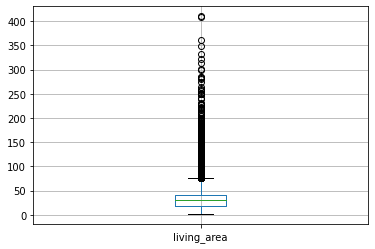

In [47]:
data.boxplot('living_area');

Также как и с общей площадью, для более побробного
анализа посмотрим на данные в срезе без выбросов особо крупных значений.

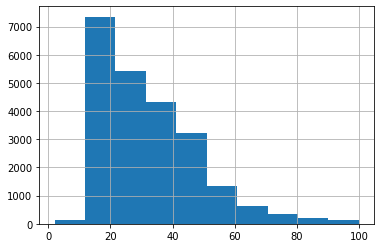

In [48]:
data[data['living_area']<100]['living_area'].hist();

Видим наибольшее количество квартир(более 7000) с жилой площадью от 17 до 21 кв.м., далее по убывающей идут квартиры с большей жилой площадью. Также имеется совсем небольшое количество квартир с очень маленькой жилой площадью (минимальное значение 2 кв.м.), сложно сказать ошибочное это значение или нет. Не будем избавляться от них, т.к. это количество небольшое и не исказит результаты анализа.


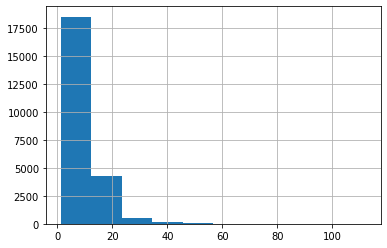

In [49]:
data['kitchen_area'].hist();

In [50]:
data['kitchen_area'].describe()

count    23565.000000
mean        10.499898
std          6.037750
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

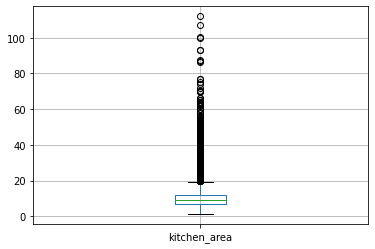

In [51]:
data.boxplot('kitchen_area');

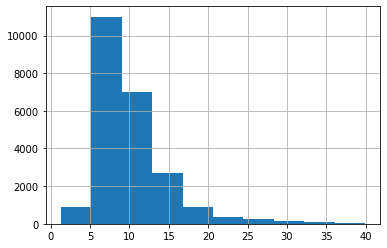

In [52]:
data[data['kitchen_area']<40]['kitchen_area'].hist();


С площадью кухни схожая ситуация, как и с оставльными площадями: есть небольшое количество квартир с самой малой площадью(до 5 кв.м.), самое большое количество квартир(более 10 000) с площадью кухни от 5 до 12 кв.м., далее по убыванию количества идут квартиры с большей площадью кухни. Имеется небольшое количество аномально больших площадей до 112 кв.м. при небольшом стандартном отклонении(6 кв.м.)

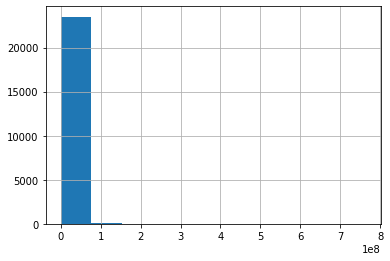

In [53]:
data['last_price'].hist();

In [54]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

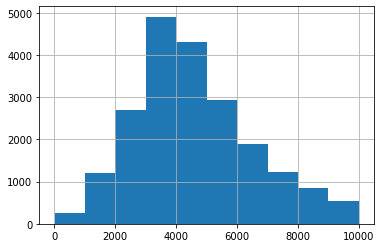

In [55]:
data['last_price'] = data['last_price']/1000 #приводим данные в столбце к читаемому виду(отображаем в тысячах)
data[data['last_price']<10000]['last_price'].hist();

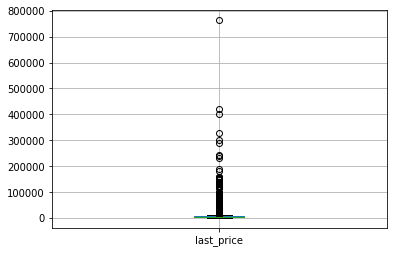

In [56]:
data.boxplot('last_price');


In [57]:
data['last_price'].describe()


count     23565.000000
mean       6540.058260
std       10910.934722
min          12.190000
25%        3400.000000
50%        4646.000000
75%        6790.000000
max      763000.000000
Name: last_price, dtype: float64

Видим большой разброс цен на квартиры, но наибольшее количество квартир в диапазоне стоимости от 3,5 до 5,5 млн.руб. Имеются как аномально малые(12 тыс.руб.), так и большие величины(до 763 млн.руб.).

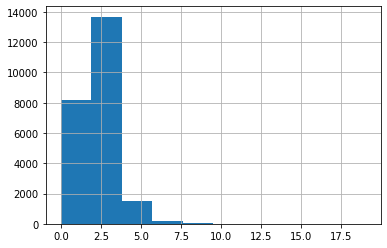

In [58]:
data['rooms'].hist();

In [59]:
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [60]:
data['rooms'].value_counts()

1     8004
2     7897
3     5779
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

Наиболее распространены квартиры с 1, 2 и 3 комнатами,но есть и аномальные значения квартир с количеством комнат от 10 до 19. Их можно удалить, но это такое малое количество(11 строк), что они не смогут исказить наше исследование.

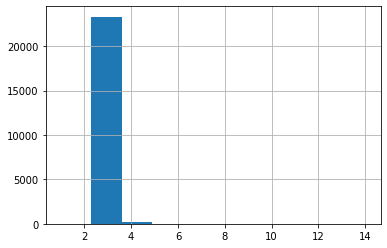

In [61]:
data['ceiling_height'].hist();

In [62]:
data['ceiling_height'].describe()

count    23565.000000
mean         2.698746
std          0.253630
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

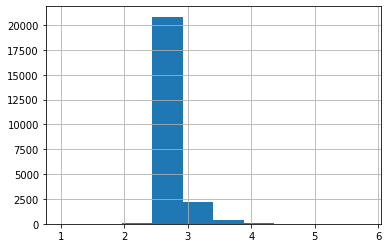

In [63]:
data[data['ceiling_height']<6]['ceiling_height'].hist();

Данный столбец уже был обработан, после чего все еще осталось некоторое количество больших значений(потолки до 14метров), но, как видно, даже с использованием различных ограничений, гистограмма показывает одну большую группу (более 20 000 строк) с высотой потолков от 2,5 до 2,7 метров, стандартое отклонение совсем небольшое - 0,25м, значит эти выбросы не искажают данные.

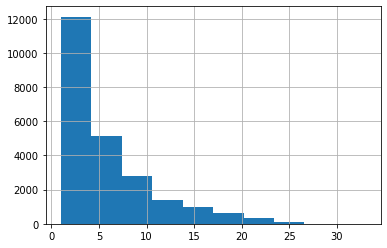

In [64]:
data['floor'].hist();

In [65]:
data['floor'].describe()

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Здесь можно увидеть,что 75% квартир находятся на этажах с 1 по 8. И имеется небольшое количество квартир на этажах с 8 по 33.

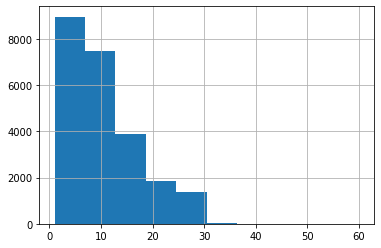

In [66]:
data['floors_total'].hist();

Тут подтверждается, что многоэтажные дома в подборке есть, но их небольшое количество(менее 2000 квартир в домах с >20 этажами.)

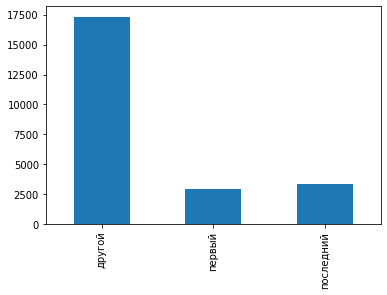

In [67]:
data['floor_type'].value_counts().sort_index(ascending=True).plot.bar();


In [68]:
data['floor_type'].value_counts()

другой       17326
последний     3330
первый        2909
Name: floor_type, dtype: int64

Меньше всего квартир на продажу на 1 этаже, основная масса - не на крайних этажах, что и логично.

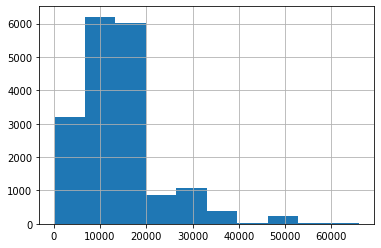

In [69]:
data['cityCenters_nearest'].hist();

In [70]:
data['cityCenters_nearest'].describe()

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

В нашей выборке больше всего квартир с удаленностью от центра в диапазоне от 8 до 20км, далее идут квартиры с удаленностью менее 8км.

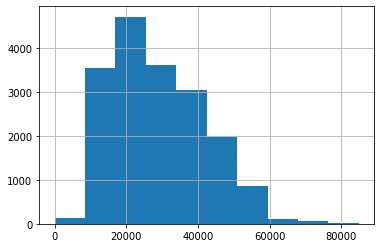

In [71]:
data['airports_nearest'].hist();

In [72]:
data['airports_nearest'].describe()

count    18041.000000
mean     28797.082701
std      12632.499735
min          0.000000
25%      18565.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

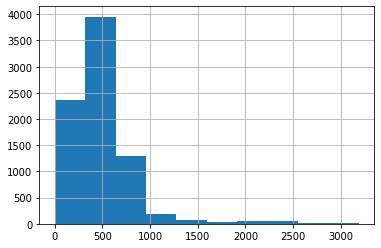

In [73]:
data['parks_nearest'].hist();

In [74]:
data['parks_nearest'].describe()

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

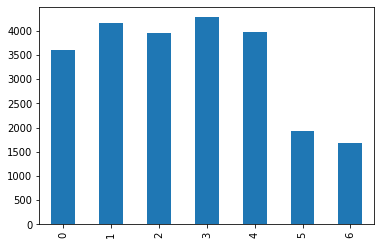

In [75]:
data['weekday'].value_counts().sort_index(ascending=True).plot.bar();

Объявления о продаже квартир публикуют преимущественнов будние дни, в выходные дни практически в 2 раза меньше.

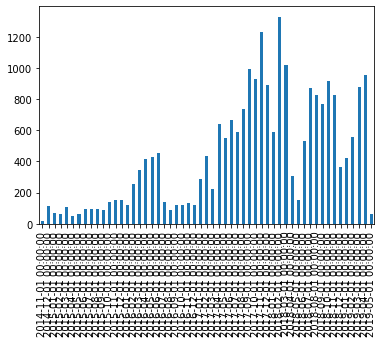

In [76]:
data['month'].value_counts().sort_index(ascending=True).plot.bar();


В разрезе месяцев публикации объявлений о продаже квартир, самые активные - февраль, март, апрель и ноябрь. Наименьшая активность публикаций в мае, декабре и январе.

#### Изучите, как быстро продавались квартиры

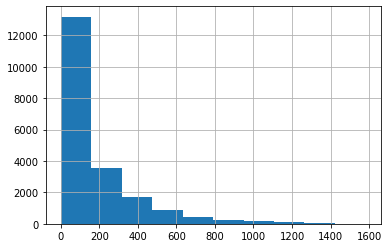

In [77]:
data['days_exposition'].hist();  


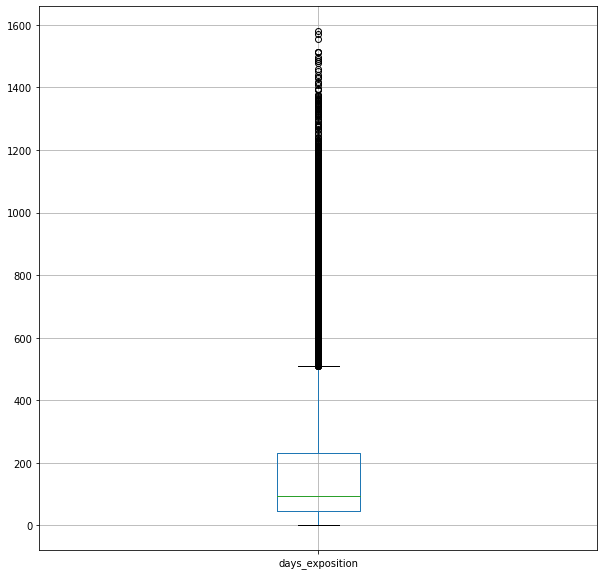

In [78]:
data[['days_exposition']].boxplot(figsize=(10,10));

Ориентировочная граница нормального размаха (1,5 межквартильного размаха, добавленного к 3-му квартилю) приблизительно 500 дней. Всё, что лежит за ней, считается выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов очень много. И всё же значения, которые отсёк верхний «ус», — редкие. Видно, насколько медиана (равна 95 дням) не стремится к длинному хвосту высоких значений.

In [79]:
data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее значение(180 дней) почти в 2 раза больше медианы(95 дней), что подтверждает, что в нашем распределении есть высокие значения, они влияют на среднее, но не на медиану. Выставим ограничение для гистограммы, чтобы не учитывать в анализе выбросы.

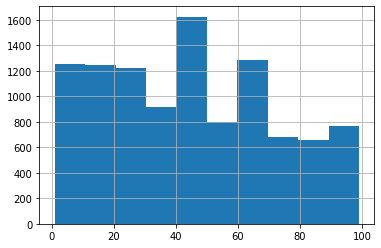

In [80]:
data[data['days_exposition']<100]['days_exposition'].hist();

Таким образом, обычно продажа квартиры занимает около 95 дней. При этом имеют место и очень быстрые продажи от одного до 30 дней, и необычно долгие - до 1580 дней, но такие долгие продажи встречаются достаточно редко. Также видно 2 пика - 40 и 60 дней, скорее всего это связано с длительностью бесплатного размещения объявлений, по прошествии данного количества времени необходимо либо снять оъявление, либо произвести оплату за размещение.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Рассмотрим зависимость цены от общей площади квартиры.

In [81]:
data['last_price'].corr(data['total_area'])

0.6536213939252803

Коэффициент корреляции 0,65 говорит о наличии линейной связи стоимости объекта и его общей площади.

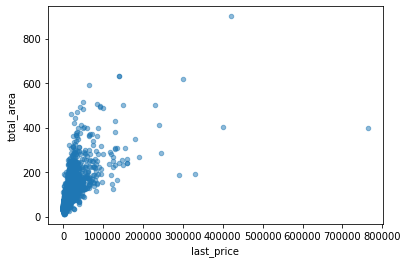

In [82]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.5);

Диаграмма получилась малоинформативной из-за наличия выбросов в ценах, попробуем убрать по 1% от цен с максимальной и минимальной стороны и снова построим диаграмму.

In [83]:
top_price = data['last_price'].quantile(0.99)
low_price = data['last_price'].quantile(0.01)
top_price, low_price

(36000.0, 1000.0)

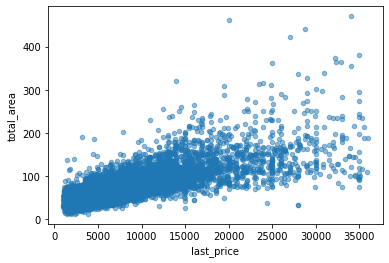

In [84]:

data.query('@top_price>last_price>@low_price').plot(x='last_price', y='total_area', kind='scatter', alpha=0.5);

Теперь лучше видна зависимость стоимости объекта от общей площади. Их связь линейная и положительная, но не слишком сильная, то есть при увеличении площади растет и стомость квартиры, но так бывает не всегда.  Чем выше значение площади и цены, тем менее сильная связь между ними. То есть стоимость объектов из более элитной категории менее предсказуема по этому параметру.

In [85]:
data['last_price'].corr(data['living_area'])

0.5856793198161233

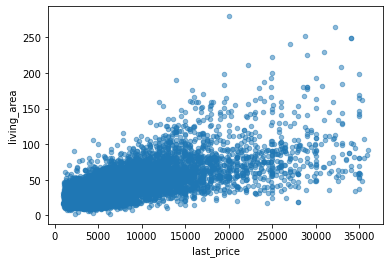

In [86]:
data.query('@top_price>last_price>@low_price').plot(x='last_price', y='living_area', kind='scatter', alpha=0.5);

Зависимость стоимости объекта от жилой площади менее сильная, но все же имеется. Стоимость квартиры растет при увеличении жилой площади.


In [87]:
data['last_price'].corr(data['kitchen_area'])

0.5145308339979164

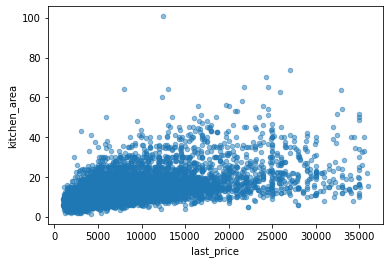

In [88]:
data.query('@top_price>last_price>@low_price').plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.5);


Схожие выводы можно сделать и по зависимости стоимости объекта и площади кухни.

In [89]:
data['last_price'].corr(data['rooms'])


0.36319054850657506

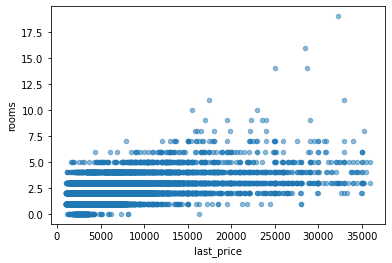

In [90]:
data.query('@top_price>last_price>@low_price').plot(x='last_price', y='rooms', kind='scatter', alpha=0.5);


И коэффициент корреляции и диаграмма говорят о том, линейная взаимосвязь между количеством комнат в квартире и ее стоимостью достаточно слабая. Она имеет место быть у менее дорогих объектов с количеством комнат до 5. Далее взаимосвязь не прослеживается.

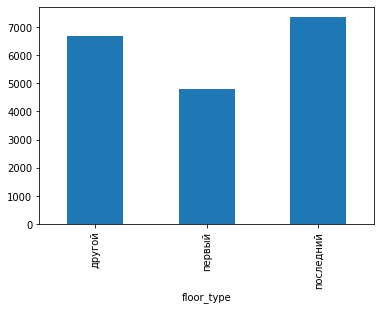

In [91]:
data.groupby('floor_type')['last_price'].mean().plot.bar();

Из графика видно, что самые дешевые квартиры находятся на первых этажах, следующими по стоимости идут квартиры не на первом или последнем этаже и самые дорогостоящие - на последнем этаже. На последнем этаже зачастую находятся видовые квартиры, либо двухуровневые с мансардным этажом, что, конечно, повышает стоимость объекта.

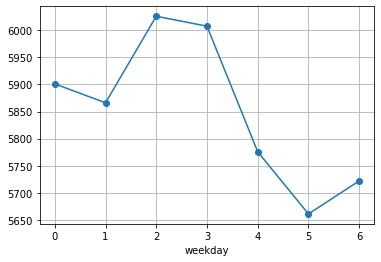

In [92]:
data.query('@top_price>last_price>@low_price').groupby('weekday')['last_price'].mean().plot(style='o-', grid=True);




In [93]:
 data['last_price'].corr(data['weekday'])

0.0013569211122710667

Судя по коэффициенту корреляции, линейной зависимости между днем публикации и стоимостью объектов нет. Можно лишь описать общие тенденции: по средам и четвергам чаще всего выставляют на продажу наиболее дорогие объекты недвижимости, а дешевые - по субботам и воскресеньям.

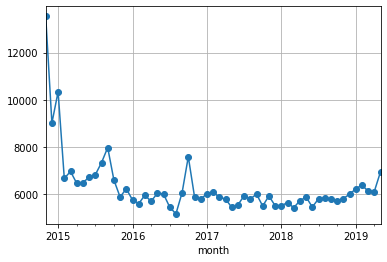

In [94]:
data.query('@top_price>last_price>@low_price').groupby('month')['last_price'].mean().plot(style='o-', grid=True);

In [95]:
#data['last_price'].corr(data['month'])

Линейная связь между месяцем публикации и стоимостью квартир также отсутствует.

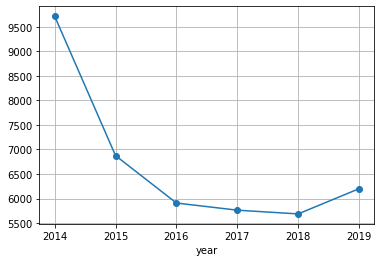

In [96]:
data.query('@top_price>last_price>@low_price').groupby('year')['last_price'].mean().plot(style='o-', grid=True);


In [97]:
data['last_price'].corr(data['year'])

-0.04286415271361104

Здесь также отсутствует линейная зависимость, но можно отметить интересные тенденции.


Судя по графику, начиная с 2014 года и вплоть до 2018 года стоимость объектов недвижимости снижалась, самое резкое падение стоимости произошло с 2014 на 2015 год. После 2018 года стоимость жилья стала возрастать. Такое поведение цен можно объяснить внешнеполитическим и внутриэкономическим влиянием на рынок недвижимости.


Прежде всего это связано с обесцениванием рубля по отношению к доллару в 2014 году (после присоединения Крыма и объявления о западных санкциях). На фоне падения курса покупатели стремились сохранить свои сбережения и активно скупали недвижимость, в том числе дорогую. Этим объясняется пик стоимости жилья в 2014 году. Из-за ослабления курса рубля в декабре 2014 ЦБ РФ принял решение резко поднять ключевую ставку— с 9,5% до 17% годовых. Ниже 10% она опустилась вновь лишь в 2017 году. Разумеется, это подняло ставки на кредиты в коммерческих банках. Что снизило доступность ипотеки для покупателей квартир вплоть до 2018 года.


(На основе статей:
https://www.novostroy.ru/articles/market/pervyy-sanktsionnyy-2014-god-na-rynke-nedvizhimosti/
https://realty.rbc.ru/news/577d23dd9a7947a78ce919ca )




*Таким образом,больше всего влияет на полную стоимость объекта общая площадь данного объекта. Взаимосвязь этих параметров положительная, то есть при увеличении площади растет и стомость квартиры.*


#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.


In [98]:
data_group = (data
    .groupby('locality_name')
    .agg({'price_of_one_meter':['count', 'mean']})
)
data_group.columns=['count', 'mean']
data_group = data_group.sort_values(by='count', ascending=False)
data_group.head(10)

,count,mean
locality_name,,
Санкт-Петербург,15651,114868.874257
поселок Мурино,552,85629.567029
поселок Шушары,439,78551.359909
Всеволожск,398,68654.474874
Пушкин,369,103125.818428
Колпино,338,75424.571006
поселок Парголово,327,90175.886850
Гатчина,307,68746.110749
деревня Кудрово,299,92473.588629


In [99]:
data[data['price_of_one_meter'] == data['price_of_one_meter'].max()][['locality_name', 'last_price']] #отображаем максимальную цену

,locality_name,last_price
12971,Санкт-Петербург,763000.0


In [100]:
data[data['price_of_one_meter'] == data['price_of_one_meter'].min()][['locality_name', 'last_price']] #отображаем минимальную цену

,locality_name,last_price
8793,Санкт-Петербург,12.19


И максимальная и минимальная стоимость квадратного метра приходится на Санкт-Петербург, видимо, это связано с тем, что в столице наибольшее число опубликованных объявлений(15 651).

#### Опишите, как стоимость объектов зависит от расстояния до центра города.


In [101]:
data_price_km = (data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='price_of_one_meter')
)
data_price_km

,price_of_one_meter
cityCenters_nearest_km,
0.0,245833.518519
1.0,177005.395833
2.0,157848.983871
3.0,121507.821839
4.0,133282.873547
5.0,140453.955191
6.0,151012.189320
7.0,156176.866667
8.0,125649.730640


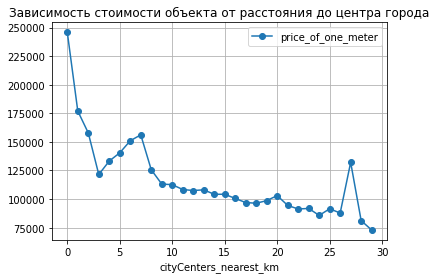

In [102]:
data_price_km.plot(style='o-', grid=True, title = 'Зависимость стоимости объекта от расстояния до центра города');


Cтоимость объектов существенно зависит от расстояния до центра города. Чем дальше от центра города, тем дешевле квартиры. Есть некоторые выбивающиеся значения, т.к. существуют и другие параметры ценообразования, элитное жилье находится не только в центре города, но общая тенденция видна.

### Общий вывод


 В ходе проведенного анализа данных сервиса Яндекс.Недвижимость было выявлено, что архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет содержал пропуски как в картографических данных, так и в добавленных пользователем. 
 
 Картографические данные, такие как расстояние до аэропорта, ближайшего парка и водоёма, могут содержать пропуски по причине отсутствия таких объектов поблизости, либо вызваны ошибкой сбора или выгрузки данных.

 Пропуски в данных, добавленных пользователем вручную могли появиться в виду человеческого фактора. Можно порекомендовать, сделать заполнение всех параметров обязательным, чтобы система не давала опубликовать объявления, пока не будут заполнены все параметры. Тогда мы сможем получить полные данные без пропусков.

 Обычно продажа квартиры занимает около 95 дней. При этом имеют место и очень быстрые продажи от одного до 30 дней, и необычно долгие - до 1580 дней, но такие долгие продажи встречаются достаточно редко.

 Больше всего влияет на полную стоимость объекта общая площадь данного объекта и расстояние до центра города. Взаимосвязь этих параметров положительная, то есть при увеличении площади и близости к центру города растет и стомость квартиры.